In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/migraine-classification/data.csv


In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
import math
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv('/kaggle/input/migraine-classification/data.csv')
df = pd.read_csv('/kaggle/input/migraine-classification/data.csv')

In [4]:
data.shape

(400, 24)

In [5]:
print('Number of training examples: %s' %str (data.shape [0]))
print('Number of features: %s' %str (data.shape [1]))


Number of training examples: 400
Number of features: 24


In [6]:
data.columns

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')

In [7]:
data['Type'].value_counts()

Typical aura with migraine       247
Migraine without aura             60
Familial hemiplegic migraine      24
Typical aura without migraine     20
Basilar-type aura                 18
Other                             17
Sporadic hemiplegic migraine      14
Name: Type, dtype: int64

In [8]:
data.Age.min() , data.Age.max()

(15, 77)

In [9]:
# data['Age'].value_counts()

<AxesSubplot:title={'center':'Range of Patient Age'}>

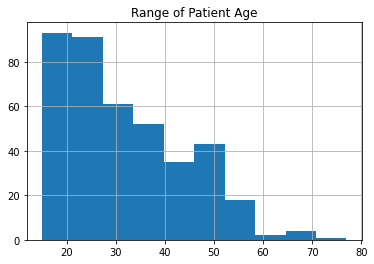

In [10]:
plt.title('Range of Patient Age')
data['Age'].hist()

In [11]:
data.Character.value_counts()

1    369
0     20
2     11
Name: Character, dtype: int64

<AxesSubplot:xlabel='Character', ylabel='count'>

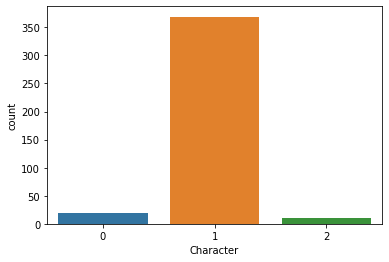

In [12]:
sns.countplot(x=data['Character'])

<AxesSubplot:xlabel='Defect', ylabel='count'>

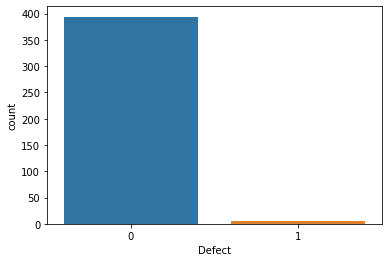

In [13]:
sns.countplot(x=data.Defect)

In [14]:
data.Type.value_counts()

Typical aura with migraine       247
Migraine without aura             60
Familial hemiplegic migraine      24
Typical aura without migraine     20
Basilar-type aura                 18
Other                             17
Sporadic hemiplegic migraine      14
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

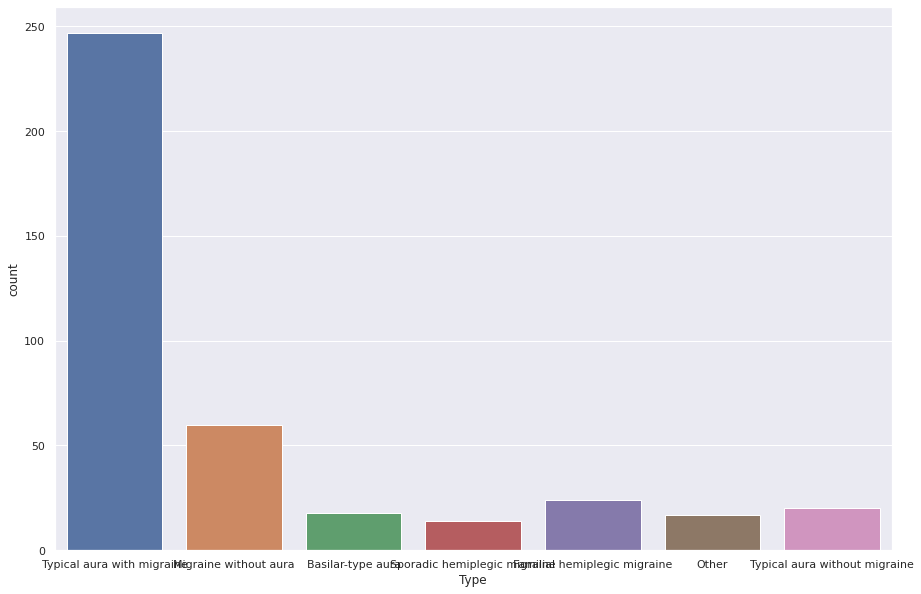

In [15]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.countplot(x=data.Type)

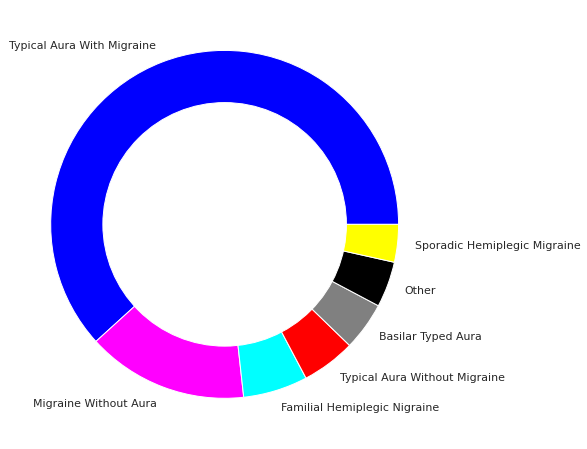

In [16]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(data.Type.value_counts(), labels=['Typical Aura With Migraine', 'Migraine Without Aura', 'Familial Hemiplegic Nigraine',
                                                'Typical Aura Without Migraine', 'Basilar Typed Aura', 
                                         'Other', 'Sporadic Hemiplegic Migraine'], colors=['blue', 'magenta', 'cyan', 
                                                                                   'red', 'grey', 'black', 'yellow'])
p = plt.gcf()
p.gca().add_artist(circle)

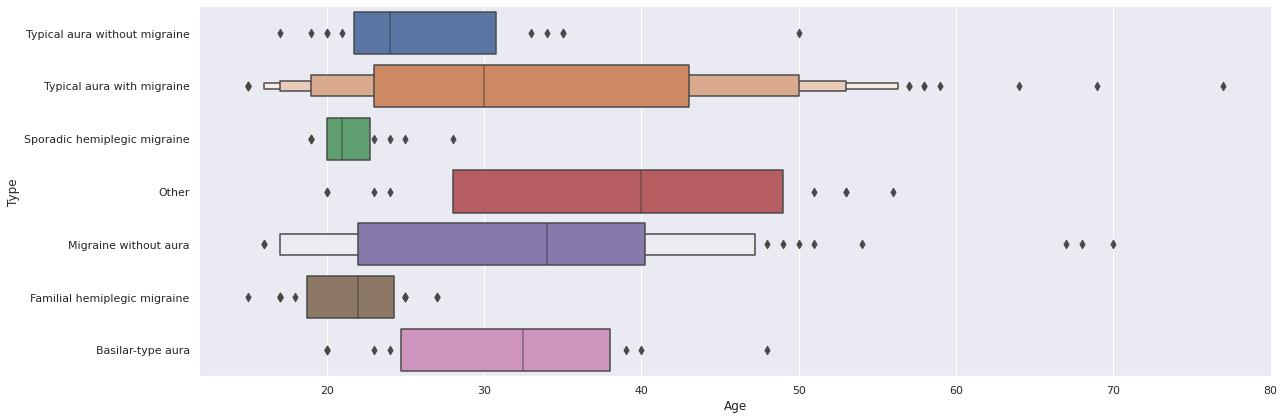

In [17]:

sns.catplot(y='Type', x='Age', data=data.sort_values("Type", ascending=False),
           kind='boxen', height=6, aspect=3)

In [18]:
data.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [19]:
#dataframes

In [20]:
data_1 = data[data['Type'] == 'Typical aura with migraine']
data_2 = data[data['Type'] == 'Migraine without aura']
data_3 = data[data['Type'] == 'Familial hemiplegic migraine']
data_4 = data[data['Type'] == 'Typical aura without migraine']
data_5 = data[data['Type'] == 'Basilar-type aura']
data_6 = data[data['Type'] == 'Other']
data_7 = data[data['Type'] == 'Sporadic hemiplegic migraine']

In [21]:
data.shape

(400, 24)

In [22]:
400/7

57.142857142857146

In [23]:
from sklearn.utils import resample
data_1_resample = resample(data_1, n_samples=200, 
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=200, 
                           random_state=123, replace=True)
data_3_resample = resample(data_3, n_samples=200, 
                           random_state=123, replace=True)
data_4_resample = resample(data_4, n_samples=200, 
                           random_state=123, replace=True)
data_5_resample = resample(data_5, n_samples=200, 
                           random_state=123, replace=True)
data_6_resample = resample(data_6, n_samples=200, 
                           random_state=123, replace=True)
data_7_resample = resample(data_7, n_samples=200, 
                           random_state=123, replace=True)

In [24]:
train_dataset = pd.concat([data_1, data_2_resample, data_3_resample, data_4_resample, 
                          data_5_resample, data_6_resample, data_7_resample])

In [25]:
train_dataset.head(3)

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine


In [26]:
train_dataset.shape

(1447, 24)

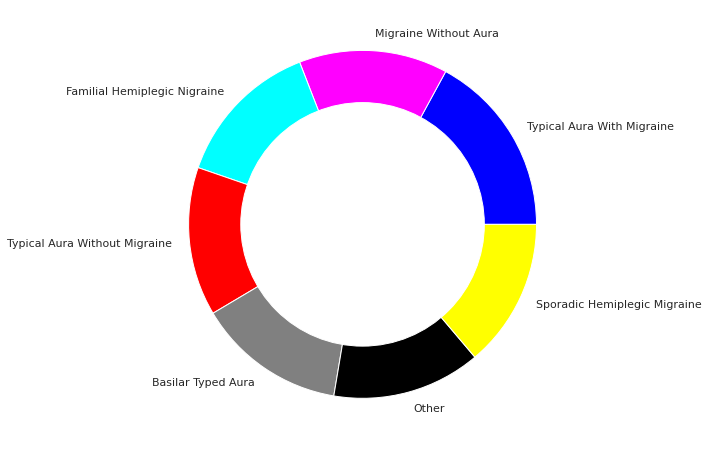

In [27]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(train_dataset.Type.value_counts(), labels=['Typical Aura With Migraine', 'Migraine Without Aura', 'Familial Hemiplegic Nigraine',
                                                'Typical Aura Without Migraine', 'Basilar Typed Aura', 
                                         'Other', 'Sporadic Hemiplegic Migraine'], colors=['blue', 'magenta', 'cyan', 
                                                                                   'red', 'grey', 'black', 'yellow'])
p = plt.gcf()
p.gca().add_artist(circle)

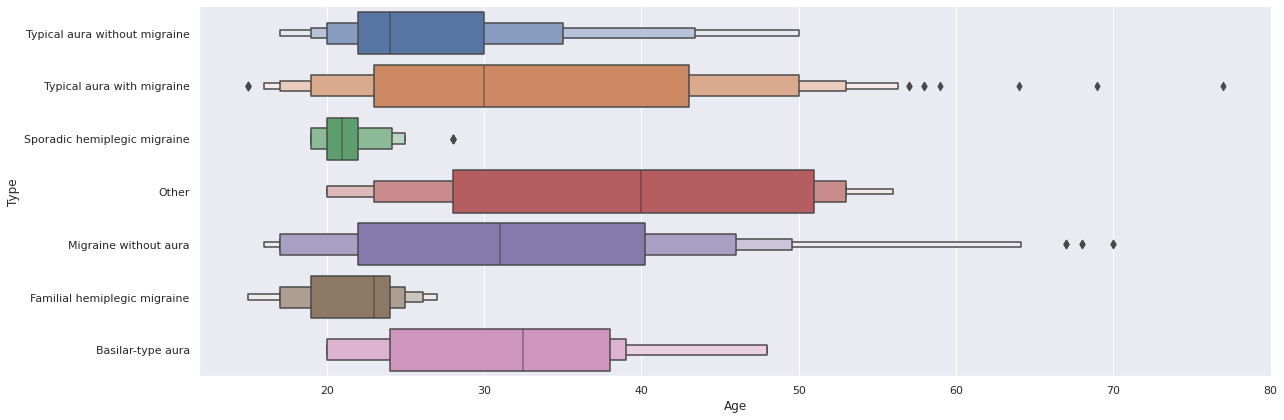

In [28]:
sns.catplot(y='Type', x='Age', data=train_dataset.sort_values("Type", ascending=False),
           kind='boxen', height=6, aspect=3)

In [29]:
X = train_dataset.drop('Type', axis=1)
Y = train_dataset['Type']

In [30]:
X.shape , Y.shape

((1447, 23), (1447,))

In [31]:
X.head(5)

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,50,3,5,1,1,3,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,45,3,5,1,1,3,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [32]:
Y.head(5)

0    Typical aura with migraine
1    Typical aura with migraine
2    Typical aura with migraine
3    Typical aura with migraine
4    Typical aura with migraine
Name: Type, dtype: object

In [33]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                  test_size=0.2, 
                                                  random_state=123)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
(1157, 23)
(290, 23)
(1157,)
(290,)

(1157, 23)
(290, 23)
(1157,)
(290,)


(290,)

In [34]:
X_arr = np.array(X)
X_arr.shape, X.shape

((1447, 23), (1447, 23))

In [35]:
X_arr

array([[30,  1,  5, ...,  0,  0,  0],
       [50,  3,  5, ...,  0,  0,  0],
       [53,  2,  1, ...,  0,  0,  0],
       ...,
       [21,  1,  1, ...,  0,  0,  0],
       [19,  1,  2, ...,  0,  0,  0],
       [24,  1,  1, ...,  0,  0,  0]])

In [36]:

from sklearn.preprocessing import LabelEncoder

In [37]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [38]:
labelled_Y = to_categorical(encoded_Y)

In [39]:
labelled_Y.shape

(1447, 7)

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                  labelled_Y, 
                                                  test_size=0.2, 
                                                  random_state=123)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1157, 23)
(290, 23)
(1157, 7)
(290, 7)


In [41]:
def naural_natwork():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(X_arr.shape[1],)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    return model

In [42]:
model= naural_natwork()

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


callback = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)



model.fit(X_train, Y_train, 
          epochs=100, 
          validation_data=(X_test, Y_test), verbose=1)

2022-12-16 06:11:42.180613: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-12-16 06:11:42.346199: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
37/37 [==============================] - 1s 10ms/step - loss: 1.7464 - accuracy: 0.3449 - val_loss: 1.2927 - val_accuracy: 0.5034
Epoch 2/100
37/37 [==============================] - 0s 4ms/step - loss: 1.1512 - accuracy: 0.5946 - val_loss: 0.9076 - val_accuracy: 0.6828
Epoch 3/100
37/37 [==============================] - 0s 4ms/step - loss: 0.7243 - accuracy: 0.7589 - val_loss: 0.6165 - val_accuracy: 0.8207
Epoch 4/100
37/37 [==============================] - 0s 4ms/step - loss: 0.4494 - accuracy: 0.8643 - val_loss: 0.5259 - val_accuracy: 0.8207
Epoch 5/100
37/37 [==============================] - 0s 4ms/step - loss: 0.3997 - accuracy: 0.8548 - val_loss: 0.4385 - val_accuracy: 0.8310
Epoch 6/100
37/37 [==============================] - 0s 4ms/step - loss: 0.3057 - accuracy: 0.8946 - val_loss: 0.3238 - val_accuracy: 0.8862
Epoch 7/100
37/37 [==============================] - 0s 4ms/step - loss: 0.2472 - accuracy: 0.9075 - val_loss: 0.3062 - val_accuracy: 0.8828
Epoch 8/100


In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               12288     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 903       
Total params: 177,415
Trainable params: 177,415
Non-trainable params: 0
_________________________________________________________________


In [44]:
hist= model.history.history

In [45]:
hist.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [46]:
acc, val_acc = hist['accuracy'], hist['val_accuracy']
loss = hist['loss']
val_loss = hist['val_loss']

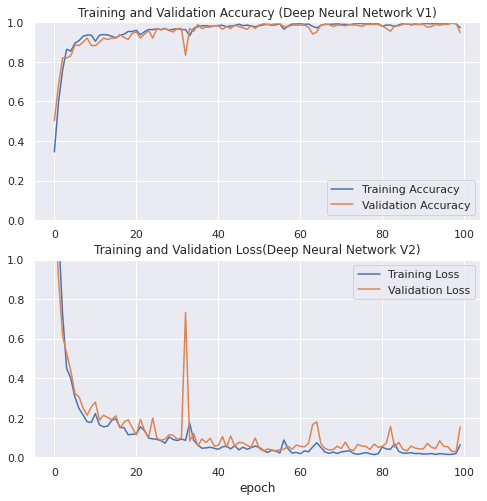

In [47]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (Deep Neural Network V1)')

print('')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])

plt.legend(loc='upper right')
plt.title('Training and Validation Loss(Deep Neural Network V2)')
plt.xlabel('epoch')
plt.show()

In [48]:
def neural_network_2():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(X_arr.shape[1],)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    return model

In [49]:
model_2 = neural_network_2()
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               6144      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 455       
Total params: 47,751
Trainable params: 47,751
Non-trainable params: 0
_________________________________________________________________


In [50]:
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy', 
              metrics=['accuracy'])

# setting a callback for controlling model's performance
callback = EarlyStopping(monitor='val_accuracy', 
                                   mode='max',
                                   patience=10,
                                   restore_best_weights=True)


# fitting the model to training data
model_2.fit(X_train, Y_train, 
          epochs=100, 
          validation_data=(X_test, Y_test), 
          verbose=1)

Epoch 1/100
37/37 [==============================] - 1s 8ms/step - loss: 1.8211 - accuracy: 0.3181 - val_loss: 1.4381 - val_accuracy: 0.5207
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 1.2991 - accuracy: 0.5557 - val_loss: 1.0942 - val_accuracy: 0.6345
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 0.9721 - accuracy: 0.6560 - val_loss: 0.8438 - val_accuracy: 0.7345
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 0.7391 - accuracy: 0.7615 - val_loss: 0.6386 - val_accuracy: 0.7897
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5771 - accuracy: 0.8280 - val_loss: 0.5419 - val_accuracy: 0.8172
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4849 - accuracy: 0.8418 - val_loss: 0.5035 - val_accuracy: 0.8448
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 0.3673 - accuracy: 0.8868 - val_loss: 0.4442 - val_accuracy: 0.8552
Epoch 8/100
3

In [51]:
hist_2 = model_2.history.history

In [52]:
acc_2, val_acc_2 = hist_2['accuracy'], hist_2['val_accuracy']
loss_2 = hist_2['loss']
val_loss_2 = hist_2['val_loss']

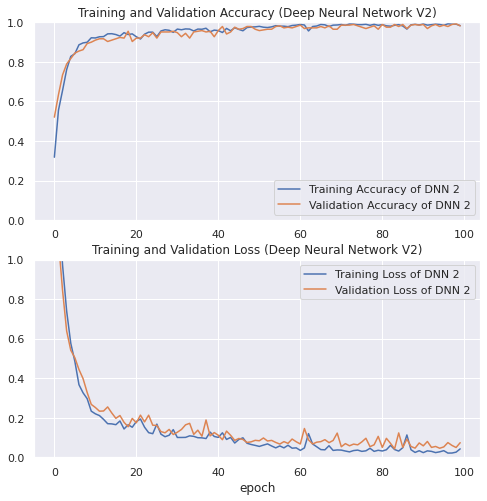

In [53]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc_2, label='Training Accuracy of DNN 2')
plt.plot(val_acc_2, label='Validation Accuracy of DNN 2')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (Deep Neural Network V2)')

print('')

plt.subplot(2, 1, 2)
plt.plot(loss_2, label='Training Loss of DNN 2')
plt.plot(val_loss_2, label='Validation Loss of DNN 2')
plt.ylim([0, 1.0])

plt.legend(loc='upper right')
plt.title('Training and Validation Loss (Deep Neural Network V2)')
plt.xlabel('epoch')
plt.show()

In [54]:
# evaluate the model
score = model.evaluate(X_test, Y_test)
score_2 = model_2.evaluate(X_test, Y_test)

# print accuracies of models 
print("%s: %.2f%%" % (model.metrics_names[1], score[1] * 100))
print('Accuracy of First Deep Neural Network: %.2f' % (score[1]*100))
print('Loss of First Deep Neural Network: %.4f' % (score[0]))

print('')

print("%s: %.2f%%" % (model_2.metrics_names[1], score_2[1] * 100))
print('Accuracy of Second Deep Neural Network: %.2f' % (score_2[1]*100))
print('Loss of Second Deep Neural Network: %.4f' % (score_2[0]))

10/10 [==============================] - 0s 2ms/step - loss: 0.0738 - accuracy: 0.9828
accuracy: 94.83%
Accuracy of First Deep Neural Network: 94.83
Loss of First Deep Neural Network: 0.1534

accuracy: 98.28%
Accuracy of Second Deep Neural Network: 98.28
Loss of Second Deep Neural Network: 0.0738


In [55]:
y_hat_nn1 = model.predict(X_test)
pred_nn1 = np.argmax(model.predict(X_test), axis=1)
Y_test_class_1 = np.argmax(Y_test, axis=1)

In [56]:
print('Classification Report of Deep Neural Network 1')
print(classification_report(Y_test_class_1, pred_nn1))

Classification Report of Deep Neural Network 1
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        47
           1       0.87      0.87      0.87        31
           2       1.00      0.97      0.99        40
           3       0.98      1.00      0.99        41
           4       0.82      1.00      0.90        36
           5       1.00      0.81      0.89        52
           6       1.00      1.00      1.00        43

    accuracy                           0.95       290
   macro avg       0.95      0.95      0.95       290
weighted avg       0.95      0.95      0.95       290



In [57]:
# classification report of second neural network
y_hat_nn2 = model_2.predict(X_test)
pred_nn2 = np.argmax(model_2.predict(X_test), axis=1)
Y_test_class_2 = np.argmax(Y_test, axis=1)

In [58]:
print('Classification Report of Deep Neural Network 2')
print(classification_report(Y_test_class_2, pred_nn2))

Classification Report of Deep Neural Network 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.91      1.00      0.95        31
           2       1.00      0.97      0.99        40
           3       0.98      1.00      0.99        41
           4       0.97      1.00      0.99        36
           5       1.00      0.92      0.96        52
           6       1.00      1.00      1.00        43

    accuracy                           0.98       290
   macro avg       0.98      0.99      0.98       290
weighted avg       0.98      0.98      0.98       290



In [59]:
x=df.drop(['Type'],1)
y=df['Type'].copy()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [60]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 101)

In [61]:
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(xtrain)
X_test_scale = scaler.transform(xtest)

In [62]:
kRange = range(1,15,1)
scores_list = []
for i in kRange:
    knn =  KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scale,ytrain)
    ypredr = knn.predict(X_test_scale)
Acc_KNN=accuracy_score(ypredr, ytest)
print('accuracy',Acc_KNN)

accuracy 0.8375


In [63]:
dtr = DecisionTreeClassifier(random_state=32)
dtr.fit(X_train_scale, ytrain)
ypreddtf = dtr.predict(X_test_scale)
Acc_DTC=accuracy_score(ypreddtf, ytest)
print('accuracy',Acc_DTC)

accuracy 0.8


In [64]:
mlp=MLPClassifier()
mlp.fit(X_train_scale, ytrain)
ypredmlp = mlp.predict(X_test_scale)
Acc_mlp=accuracy_score(ypredmlp,ytest )
print('accuracy',Acc_mlp)

accuracy 0.95


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [65]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X_train_scale, ytrain)
ypredclf = clf.predict(X_test_scale)
Acc_clf=accuracy_score(ytest,ypredclf)
print('accuracy',Acc_clf)

accuracy 0.95


In [66]:
rfr = RandomForestClassifier(random_state= 32)
rfr.fit(X_train_scale, ytrain)
ypredrfr = rfr.predict(X_test_scale)
Acc_RF=accuracy_score(ypredrfr,ytest)
print('accuracy',Acc_RF)

accuracy 0.875


In [67]:
param_grid = {
        'hidden_layer_sizes': [(7, 7), (128,), (128, 7)],
        'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
        'epsilon': [1e-3, 1e-7, 1e-8, 1e-9, 1e-8]
    }
estimator = GridSearchCV(
        MLPClassifier(learning_rate='adaptive', learning_rate_init=1., early_stopping=True, shuffle=True),
        param_grid=param_grid, n_jobs=-1)
estimator.fit(X_train_scale, ytrain)
grid_predictions = estimator.predict(X_test_scale)
Acc_grid_mlp=accuracy_score(grid_predictions,ytest)
print('accuracy',Acc_grid_mlp)

accuracy 0.85


In [68]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
grida = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
grida.fit(X_train_scale,ytrain)
grid_predictions = grida.predict(X_test_scale)
Acc_grid_scv=accuracy_score(grid_predictions,ytest)
print('accuracy',Acc_grid_scv)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

In [69]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'MLPClassifier', 
              'KNeighborsClassifier', 'DecisionTreeClassifier','support vector classifier','svc with gridsearch','mlp with gridsearch'],
    'Score': [Acc_RF, Acc_mlp, 
              Acc_KNN, Acc_DTC,Acc_clf,Acc_grid_scv,Acc_grid_mlp]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,svc with gridsearch,0.9625
1,MLPClassifier,0.9500
4,support vector classifier,0.9500
0,Random Forest,0.8750
6,mlp with gridsearch,0.8500
2,KNeighborsClassifier,0.8375
3,DecisionTreeClassifier,0.8000
